In [68]:
from scipy import random as r, constants as cons
import numpy as np
import matplotlib.pyplot as plt

h = cons.h
c = cons.c
kb = cons.k
b = cons.Wien

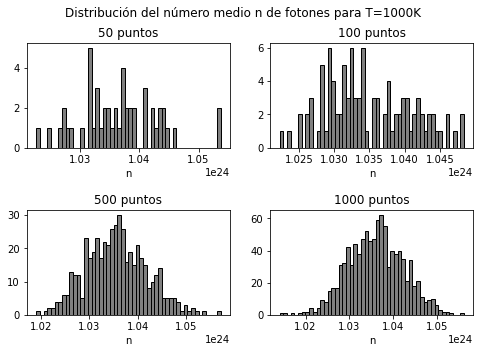

In [69]:
"""1. Con base en la distribucion de energias, obtenida de la radiacion de cuerpo negro, estime
computacionalmente el numero medio de fotones en cada modo correspondiente al espectro
visible.
"""

def f1(x, T):
    E = (h*c)/x
    I = (2*h*(c**2))/((x**5)*(np.exp((h*c)/(x*kb*T))-1))
    return I/E

def montecarlo1(n, T):
    mt = []
    for i in range(n):
        X = r.uniform(3.8e-7,7.5e-7,size=100000)
        fx = f1(X,T)
        mt.append(np.mean(fx))
    return mt

def graph1(T):
    sizes = [50,100,500,1000]
    for n in sizes:
        sample = montecarlo1(n, T)
        fig = plt.subplot(2, 2, sizes.index(n)+1)
        fig.hist(sample, bins=50, color="grey", ec="black")
        fig.set_title('%d puntos' % sizes[sizes.index(n)])
        fig.set_xlabel("n")
    plt.subplots_adjust(hspace=0.6)
    plt.suptitle(f"Distribución del número medio n de fotones para T={T}K")
    plt.rc('figure', figsize=(8,5))
    plt.show()

graph1(1000)


<ipython-input-70-c70be056005e>:8: RuntimeWarning: overflow encountered in exp
  return (2*h*(c**2))/((x**5)*(np.exp((h*c)/(x*kb*T))-1))


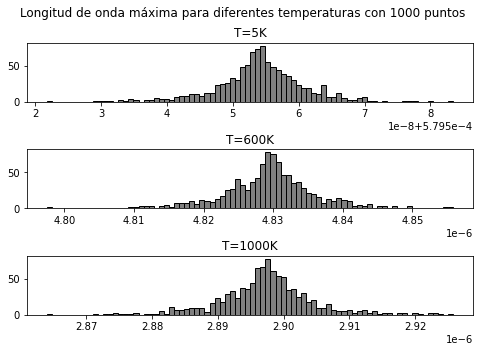

In [70]:
"""
2. Con base en la distribucion de intensidades vista en la complementaria estime la longitud de onda
mas probable para T=1000K, 600K, 5K (Ley de Wien). Compare sus resultados
con lo obtenido de la teoria.
"""

def f2(x,T):
    return (2*h*(c**2))/((x**5)*(np.exp((h*c)/(x*kb*T))-1))

def montecarlo2(n, T):
    l = []
    for i in range(n):
        X = r.uniform(1e-9,1e-3 ,size=100000)
        I = f2(X,T)
        l.append(X[np.argmax(I)])
    return l

def graph2(n):
    T = [5,600,1000]
    for t in T:
        sample = montecarlo2(n, t)
        fig = plt.subplot(3, 1, T.index(t)+1)
        fig.hist(sample, bins=80, color="grey", ec="black")
        fig.set_title('T=%dK' % T[T.index(t)])
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle(f"Longitud de onda máxima para diferentes temperaturas con {n} puntos")
    plt.rc('figure', figsize=(10,5))
    plt.show()

graph2(1000)